<div style="background-color : white; border-radius: 15px; width: 93%; padding: 2em; color: black; font-family: Gill Sans, sans-serif;">
<h1 style ="text-align: center; color: black; font-family: Gill Sans, sans-serif;font-weight: 700;"> Test del mio algoritmo su dataset infarto</h1>
<h2>Indice</h2>

<ol type="1">
    <li style="padding-top: 0.3em; padding-bottom: 0.3em;"><a href="#intro">Modello implementato</a></li>
    <li style="padding-top: 0.3em; padding-bottom: 0.3em;"><a href="#struttura">Preparazione dataset</a>
        <ul>       
            <li style="padding-top: 0.3em; padding-bottom: 0.3em;">2.1 Caricamento dataset</li>
            <li style="padding-bottom: 0.3em;">2.2 Struttura dei dati
                <ul>
                    <li style="padding-top: 0.3em; padding-bottom: 0.3em;">2.2.1 Shape del dataset</li>
                    <li style="padding-bottom: 0.3em;">2.2.2 Intestazione dei dati</li>
                    <li style="padding-bottom: 0.3em;">2.2.3 Tipi di dati</li>
                    <li style="padding-bottom: 0.3em;">2.2.4 Visualizzazione di alcuni dati</li>
                    <li style="padding-bottom: 0.3em;">2.2.5 Statistiche dei dati</li>
                    <li>2.2.6 Valori nulli</li>
                </ul>
            </li>
            <li style="padding-bottom: 0.3em;">2.3 Grafici sul dataset
                <ul>
                    <li style="padding-top: 0.3em; padding-bottom: 0.3em;">2.3.1 Bilanciamento dei valori target</li>
                    <li style="padding-bottom: 0.3em;">2.3.2 Distribuzione dei valori delle features continue</li>
                    <li style="padding-bottom: 0.3em;">2.3.3 Distribuzione dei valori delle features discrete</li>
                    <li style="padding-bottom: 0.3em;">2.3.4 Correlation Matrix</li>
                    <li style="padding-bottom: 0.3em;">2.3.5 Distribuzione delle features in base al target</li>
                    <li>2.3.6 Pairplot in base al target</li>
                </ul>
            </li>
        </ul>
    </li>
    <li style="padding-top: 0.3em; padding-bottom: 0.3em;"><a href="#struttura">Preparazione dataset</a>
        <ul>
            <li style="padding-top: 0.3em; padding-bottom: 0.3em;">3.1 Divisione del dataset in train e test set</li>
            <li style="padding-bottom: 0.3em;">3.2 Manipolazione dei dati</li>
            <li>3.3 Normalizzazione dei dati</li>
        </ul>
    </li>
    <li style="padding-top: 0.3em; padding-bottom: 0.3em;"><a href="#grafici">Applicazione del modello</a>
        <ul>
            <li style="padding-top: 0.3em; padding-bottom: 0.3em;">4.1 Allenamento del modello</li>
            <li>4.2 Risultati del modello allenato</li>
        </ul>
    </li>
    <li style="padding-top: 0.3em; padding-bottom: 0.3em;"><a href="#conclusioni">Valutazione del modello</a></li>
        <ul>
            <li style="padding-top: 0.3em; padding-bottom: 0.3em;">5.1 Metrica d'errore</li>
            <li style="padding-bottom: 0.3em;">5.2 Confusion Matrix</li>
            <li style="padding-bottom: 0.3em;">5.3 Curva precision e recall</li>
            <li>5.4 Curva ROC e AUC</li>
        </ul>
    </li>
</ol>
</div>

<div style="background-color: white; border-top-left-radius: 15px; border-top-right-radius: 15px; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <a id="#intro" style="text-decoration:none; color: black;"><h3 style="font-weight:700;"> 1. Modello implementato </h3></a>
</div>

In [197]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, f1_score, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import random

def logistic(z):
    den = 1 + np.exp(-z)
    sigm = 1.0/den
    return sigm

def hyp(W,X):
    param = np.dot(W,X.T)
    return logistic(param)

def cost(W,X,Y):
    m = X.shape[0]
    h = hyp(W,X)
    log_h = np.log(h)
    log_one_h = np.log(1-h)
    l_cost = float((-1.0/m) * ((np.dot(log_h,Y)) + (np.dot(log_one_h,(1-Y)))))
    return l_cost

def gradient_ascent(X,W,Y,alpha,stop):
    m,n = X.shape
    cost_old = np.inf
    cost_new = cost(W,X,Y)
    print(cost_old - cost(W,X,Y))
    sum = 0
    iter = 0

    while(abs(cost_old-cost_new) > stop):
        for j in range(0,n):
            for i in range(0,m):
                sum += (Y[i][0] - hyp(W,X[i])) * X[i][j]
            W[0][j] = W[0][j] + (alpha/m) * sum
        cost_old = cost_new
        cost_new = cost(W,X,Y)
        print(cost_old - cost(W,X,Y))
        iter += 1

    print(W)
    return iter  

def prediction(W,X,Y):
    m = X.shape[0]
    h = hyp(X, W)
    Y_hat = h > 0.5
    accuracy = 1.0/m * np.sum(Y == Y_hat)
    return accuracy, Y_hat, h

<div style="background-color: white; border-bottom-left-radius:15px; border-bottom-right-radius:15px; width:93%; padding:2em 2em 0.2em 2em; font-family:Gill Sans, sans-serif;">
</div>

<div style="background-color: white; border-top-left-radius: 15px; border-top-right-radius: 15px; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <a id="#intro" style="text-decoration:none; color: black;"><h3 style="font-weight:700;"> 2. Preparazione del dataset </h3></a>
    <h4 style="color:black"> 2.1 Caricamento del dataset </h4>
</div>

In [2]:
# Carico il dataset
path = './heart.csv'
data = pd.read_csv(path)

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 2.2 Struttura dei dati </h4>
    <h5 style="color: black;"> 2.2.1 Shape del dataset </h5>
</div>

In [3]:
data.shape

(303, 14)

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h5 style="color: black;"> 2.2.2 Intestazione dei dati </h5>
</div>

In [4]:
data_name = data.columns.values.tolist()
data_name

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h5 style="color: black;"> 2.2.3 Tipi di dati </h5>
</div>

In [5]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h5 style="color: black;"> 2.2.4 Visualizzazione di alcuni dati </h5>
</div>

In [6]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h5 style="color: black;"> 2.2.5 Statistiche sui dati </h5>
</div>

In [7]:
data.describe().round(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h5 style="color: black;"> 2.2.6 Valori nulli </h5>
</div>

In [8]:
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 2.3 Grafici sul dataset </h4>
    <h5 style="color: black;"> 2.3.1 Bilanciamento dei valori target </h5>
</div>

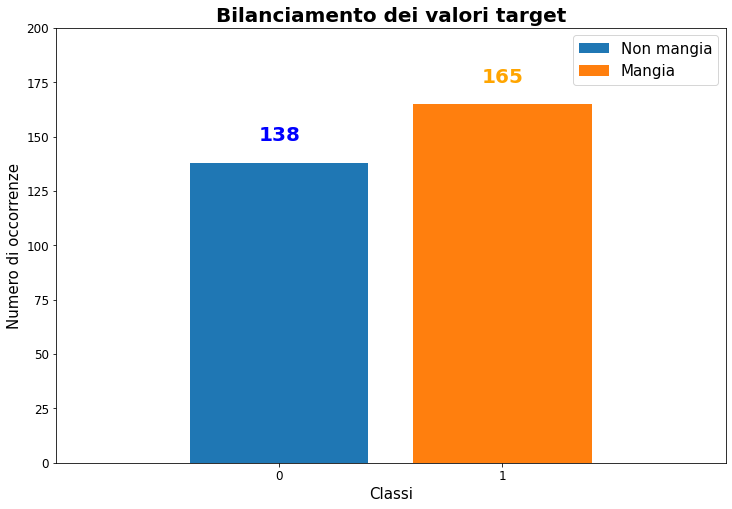

In [9]:
data_class_0_len = len(data[data.output == 0])
data_class_1_len = len(data[data.output == 1])

fig, ax = plt.subplots(figsize=(12,8))
plt.title("Bilanciamento dei valori target", fontsize=20, fontweight='bold')
ax.bar(0,data_class_0_len, label='Non mangia', align="center")
ax.bar(1,data_class_1_len, label='Mangia', align="center")

ax.set(xticks=range(2), xlim=[-1, 2])
ax.set(ylim=[0, 200])
ax.text(0-0.093,data_class_0_len + 10,str(data_class_0_len), color='blue', fontweight='bold', fontsize=20)
ax.text(1-0.093,data_class_1_len + 10,str(data_class_1_len), color='orange', fontweight='bold', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.legend(fontsize=15)
ax.set_xlabel('Classi', fontsize=15)
ax.set_ylabel('Numero di occorrenze', fontsize=15)
plt.show()

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 2.3.2 Distribuzione dei valori delle features continue</h4>
</div>

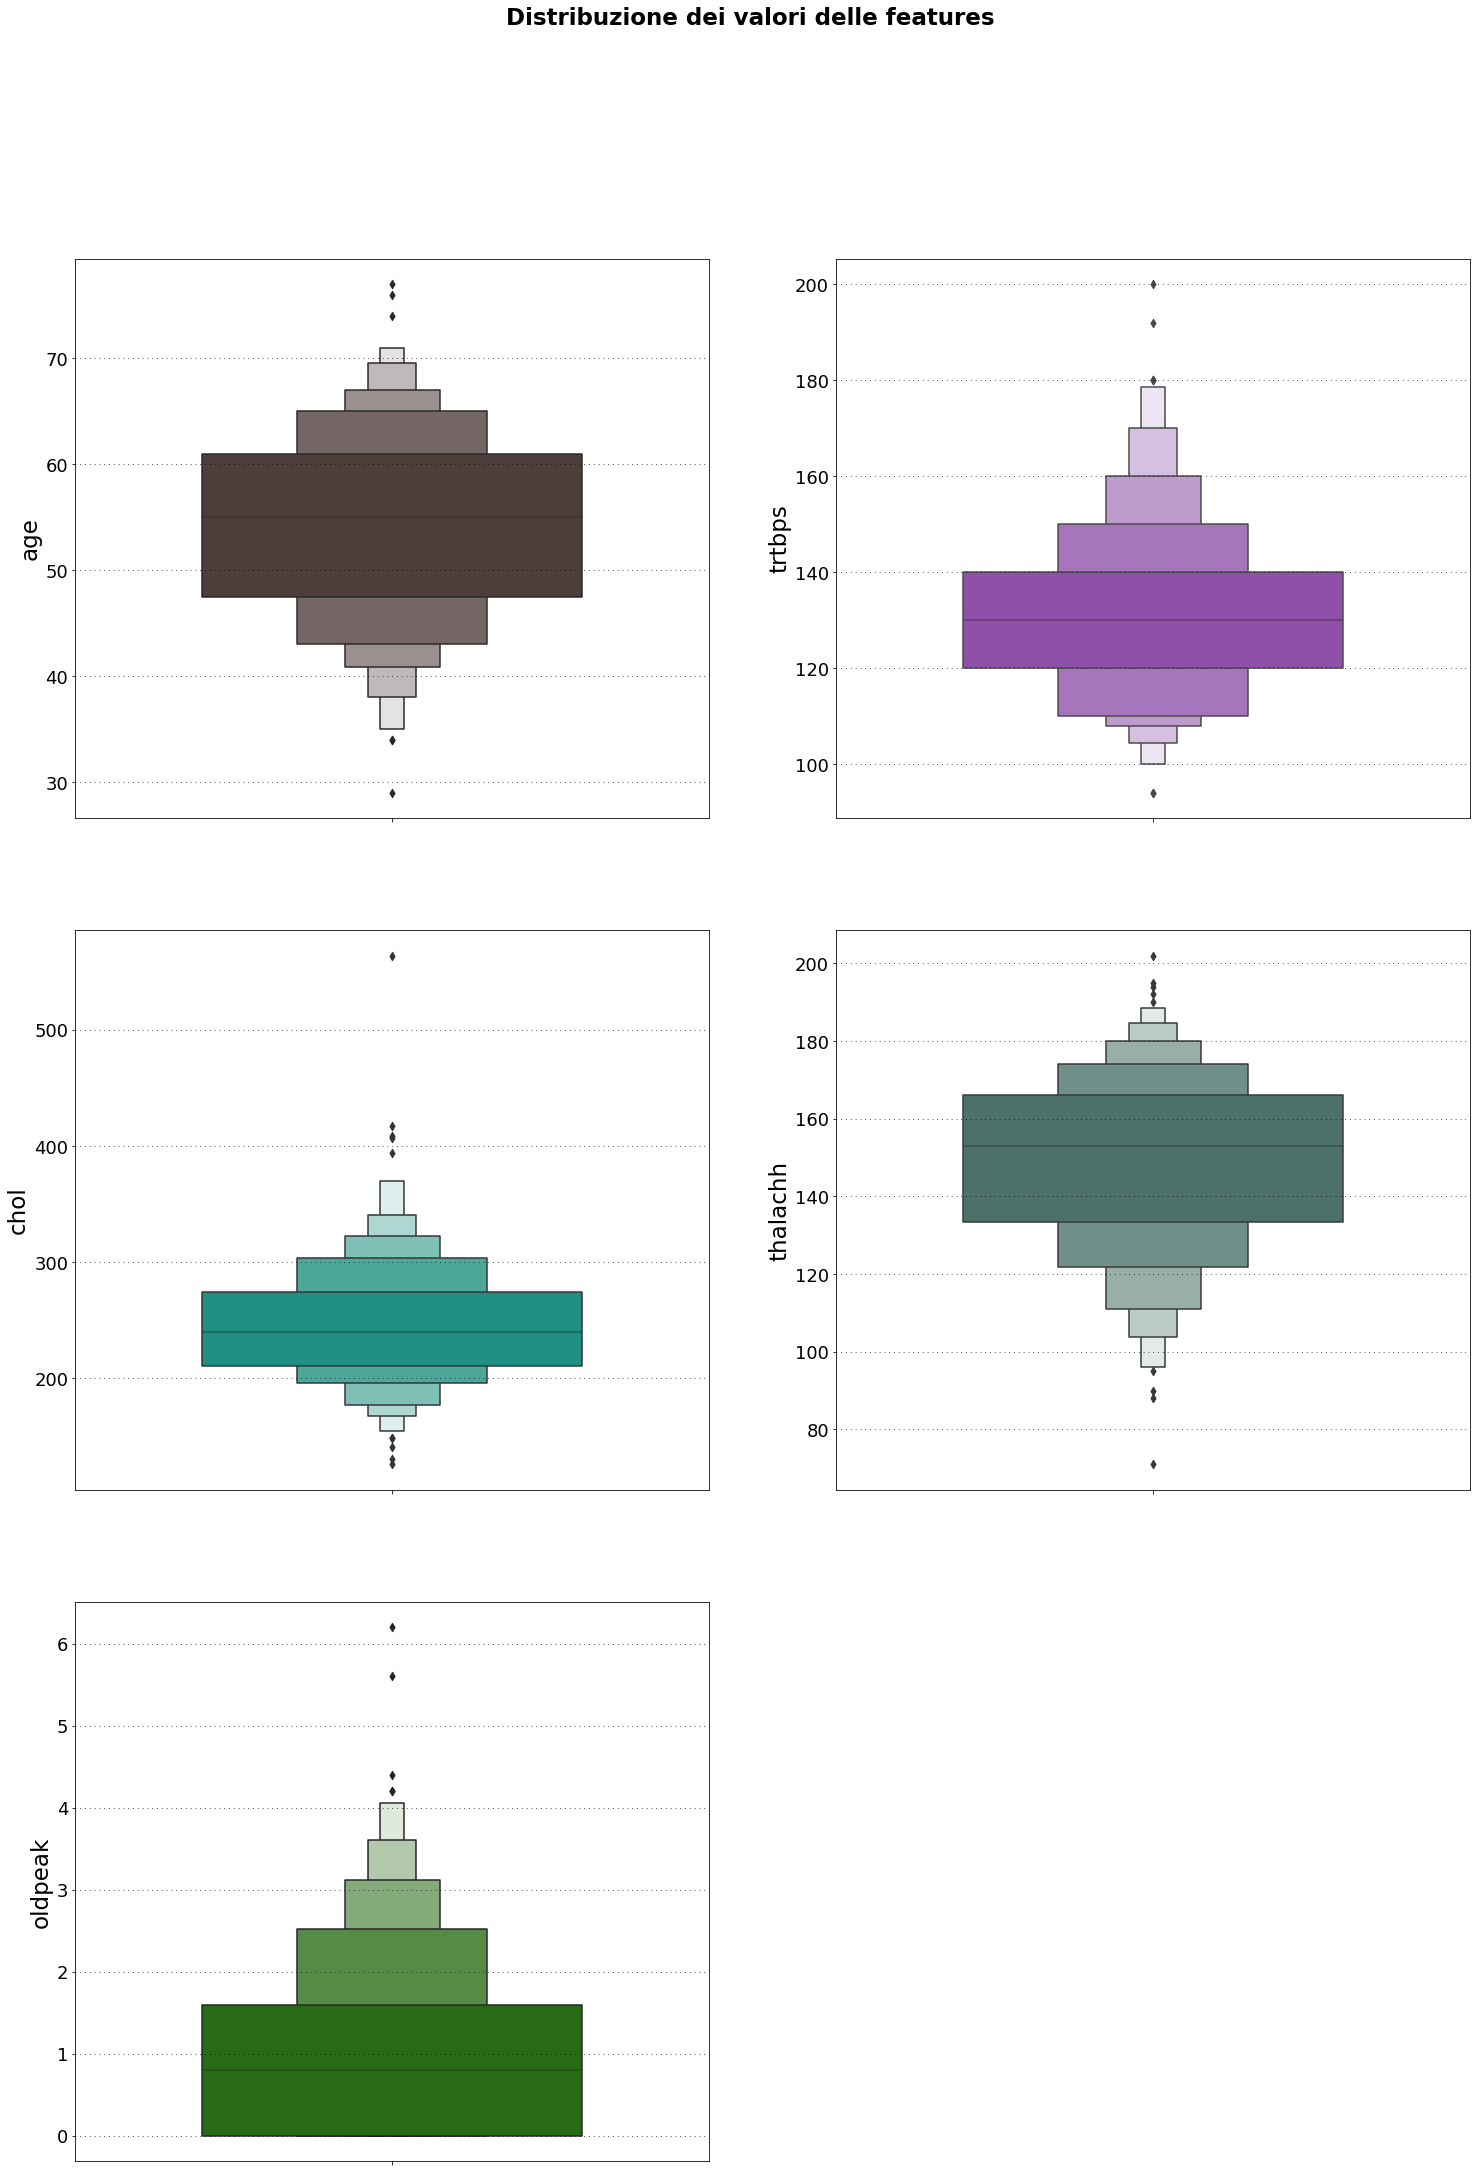

In [10]:
fig, axs = plt.subplots(3,2, figsize=(25,35))
plt.suptitle("Distribuzione dei valori delle features", fontsize=23, fontweight='bold')
continuos = ["age","trtbps","chol","thalachh","oldpeak"]
cnt = 0

for row in range(0,3):
    for col in range(0,2):
        color = rand_colors = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]

        if(cnt <= len(continuos)-1):
            sns.boxenplot(ax=axs[row][col],y=data[continuos[cnt]],palette=color,width=0.6)
            axs[row][col].grid(color="#000000", linestyle=':', axis='y', zorder=0,  dashes=(1,5))
            axs[row][col].tick_params(axis='y', labelsize=18)
            axs[row][col].yaxis.label.set_size(18)
            axs[row][col].set_ylabel(continuos[cnt], fontsize=23)

            cnt += 1

fig.delaxes(axs[2][1])

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 2.3.3 Distribuzione dei valori delle features discrete</h4>
</div>

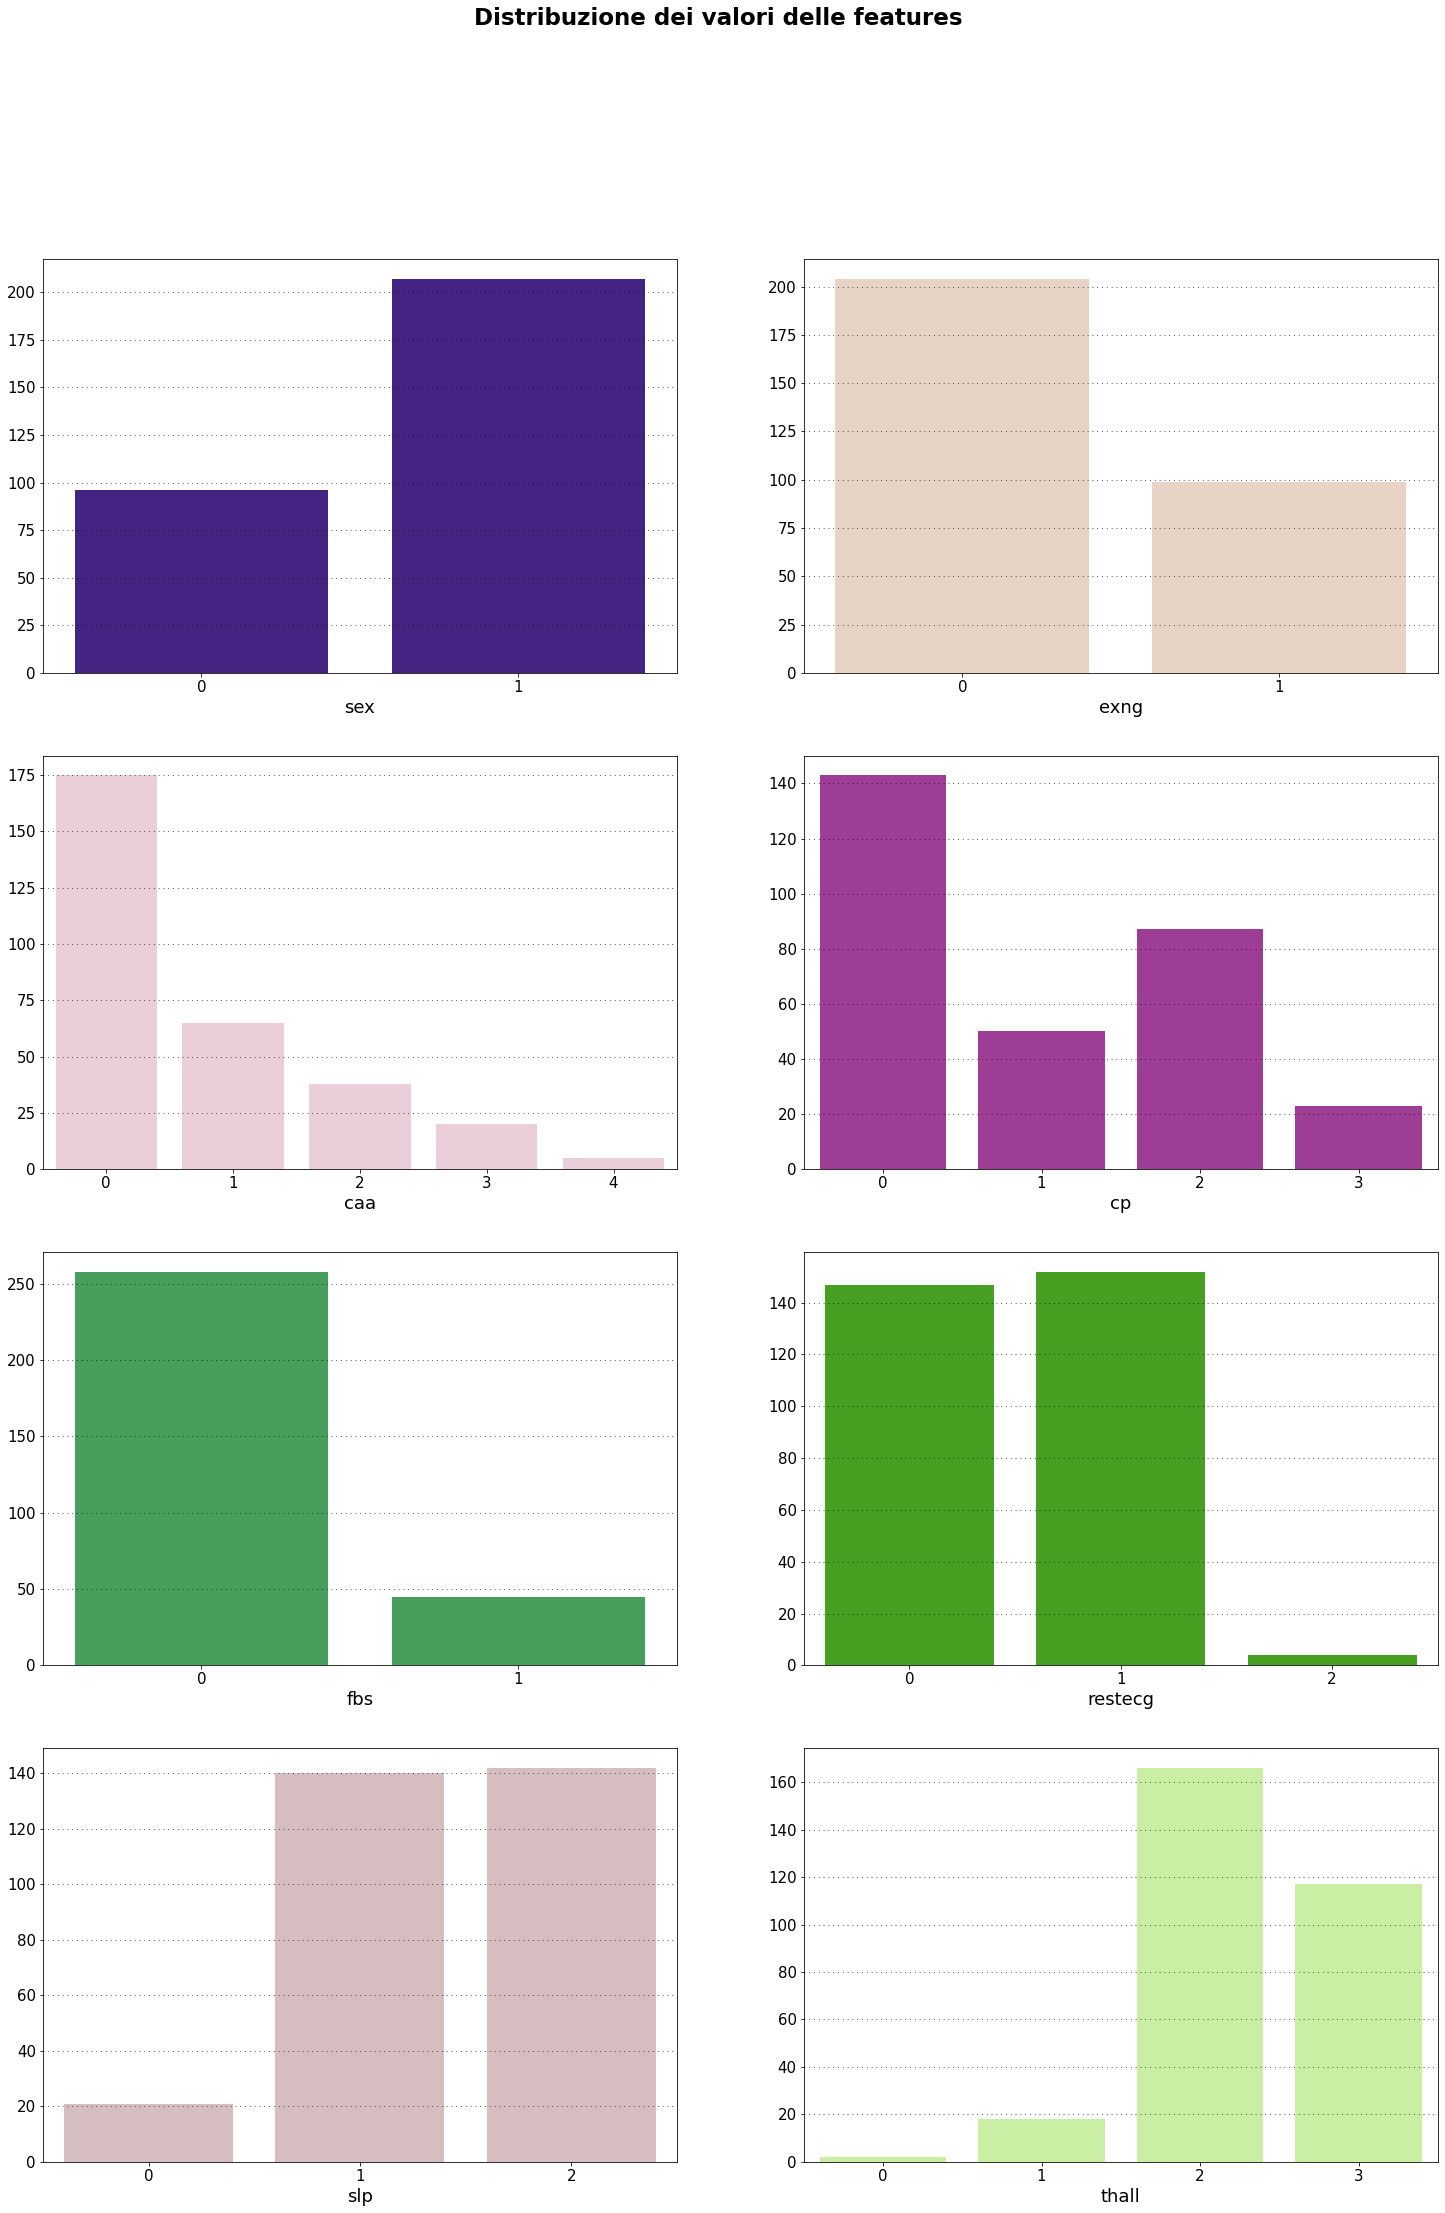

In [11]:
fig, axs = plt.subplots(4,2, figsize=(25,35))
plt.suptitle("Distribuzione dei valori delle features", fontsize=23, fontweight='bold')
discrete = ["sex","exng","caa","cp","fbs","restecg","slp","thall"]
cnt = 0

for row in range(0,4):
    for col in range(0,2):
        color = rand_colors = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]

        if(cnt <= len(discrete)):
            axs[row][col].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
            sns.countplot(ax=axs[row][col],data=data,x=discrete[cnt],palette=color)
            axs[row][col].tick_params(axis='y', labelsize=15)
            axs[row][col].tick_params(axis='x', labelsize=15)
            axs[row][col].set_xlabel(discrete[cnt], fontsize=18)
            axs[row][col].set_ylabel("")

            cnt += 1

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 2.3.4 Correlation Matrix</h4>
</div>

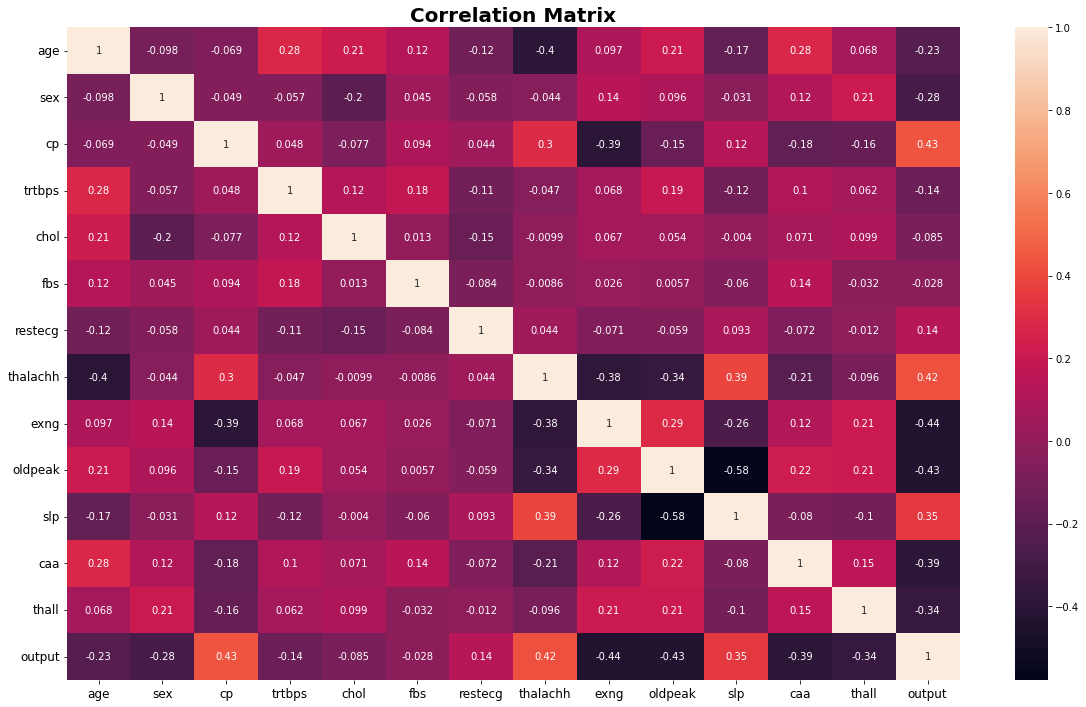

In [12]:
plt.subplots(figsize=(20,12))

plt.title("Correlation Matrix", fontsize=20, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 2.3.5 Distribuzione delle features in base al target </h4>
</div>

output


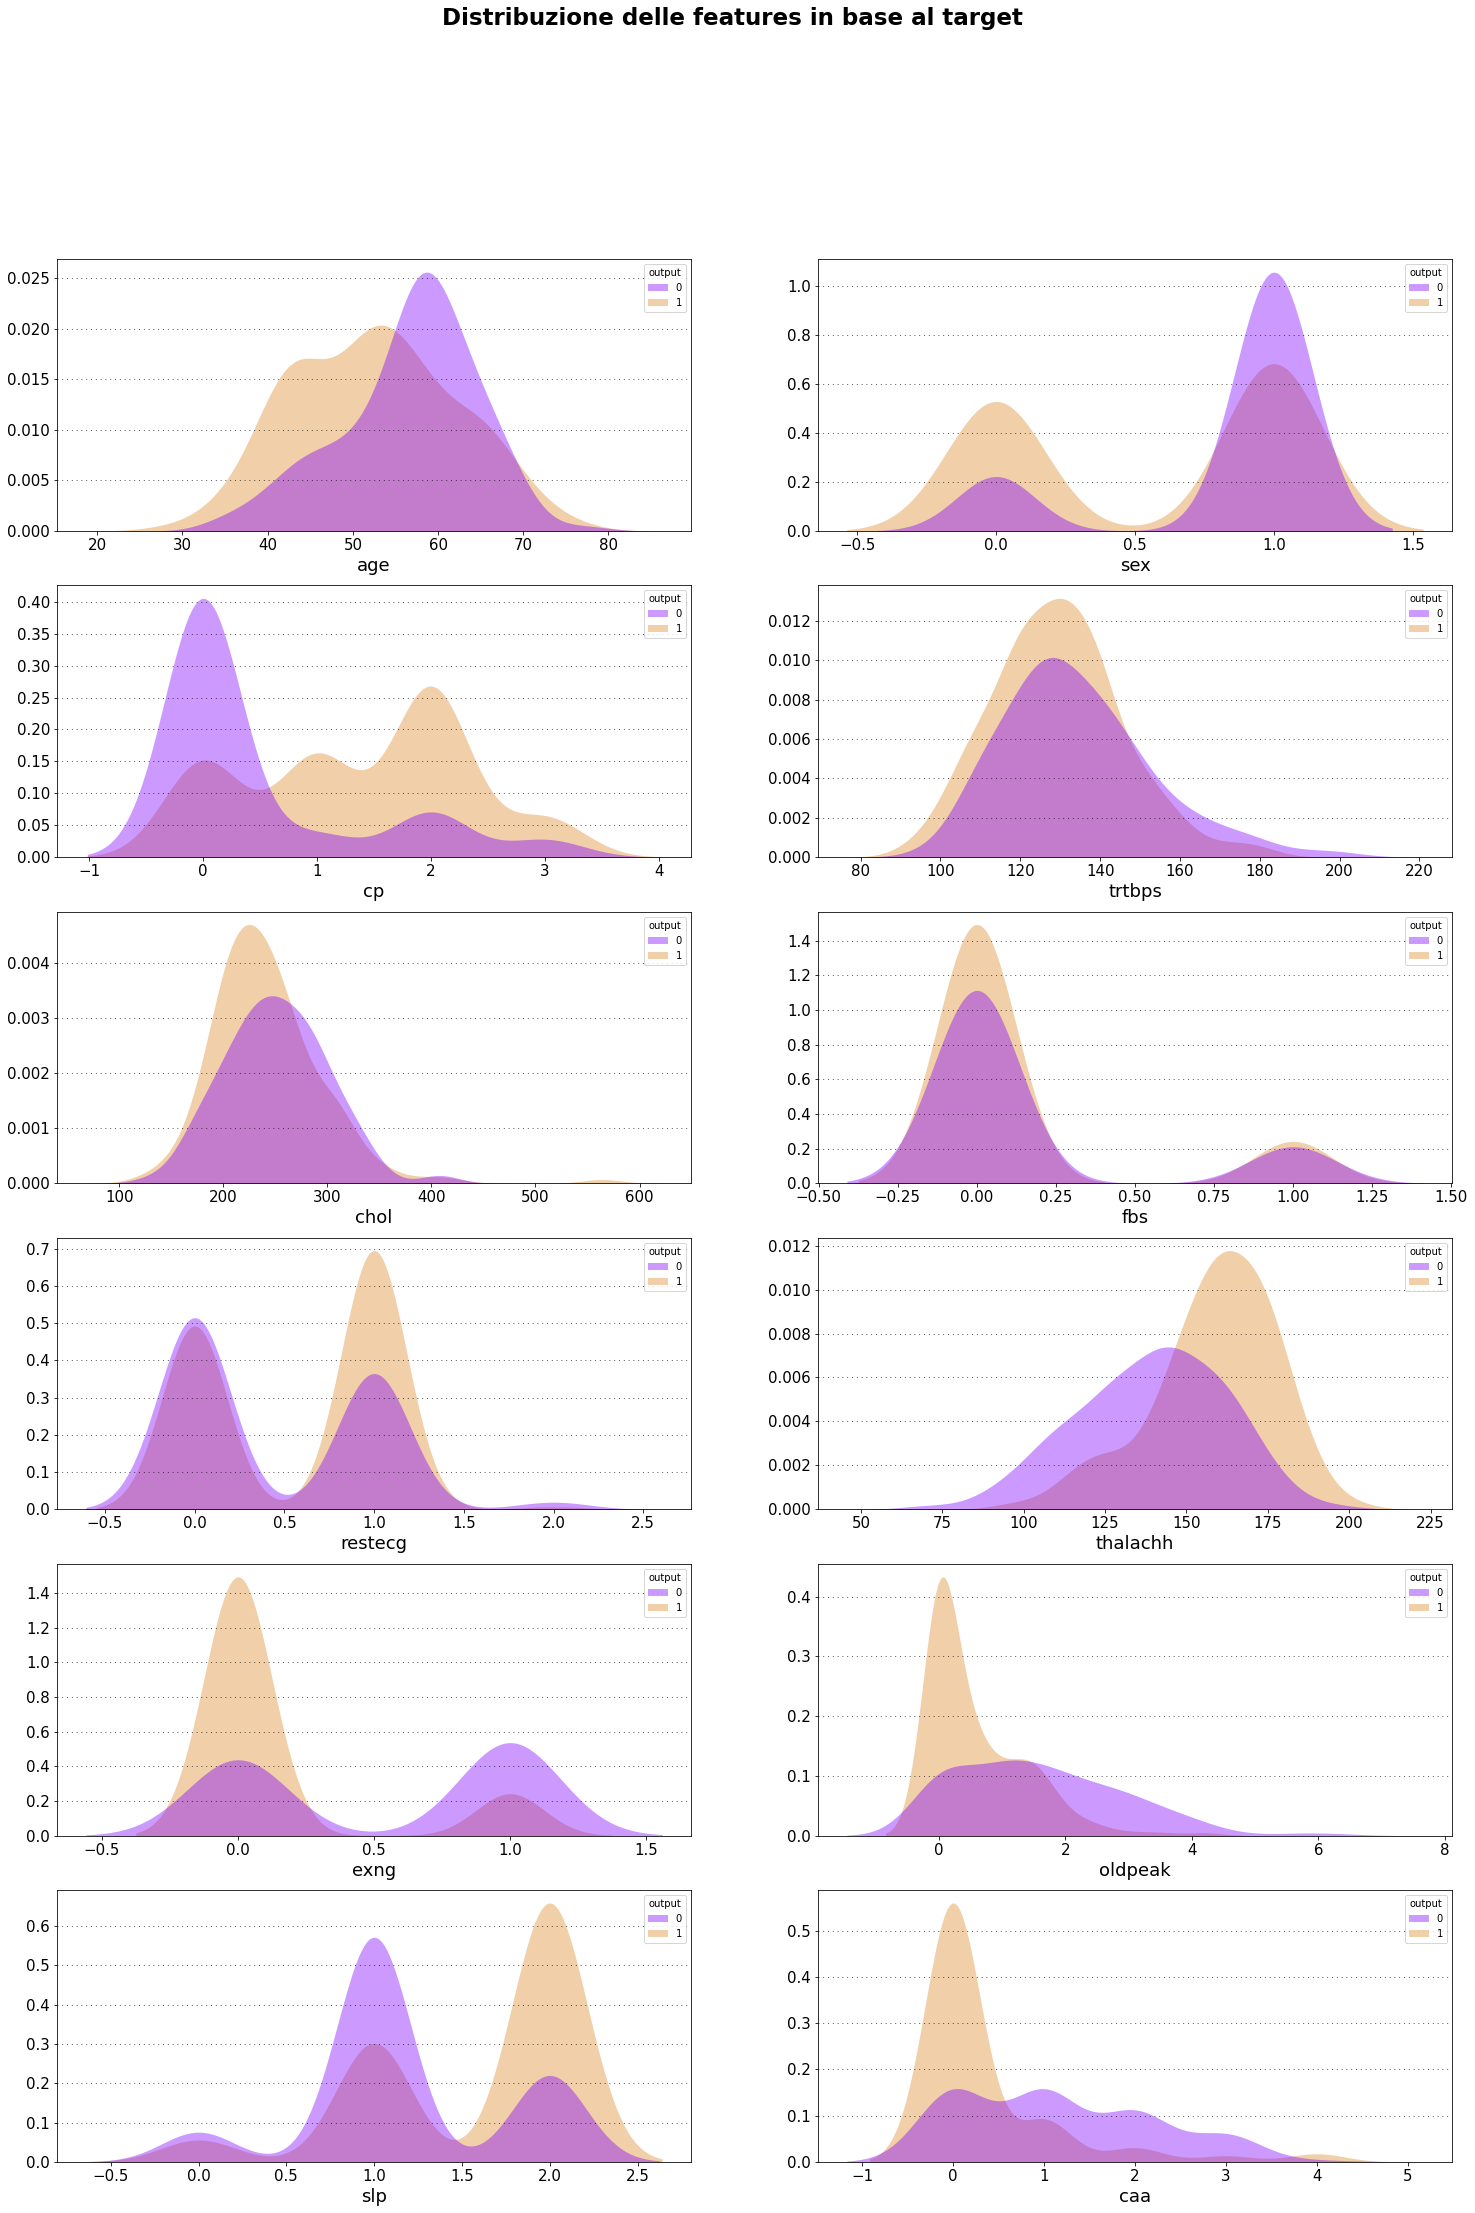

In [13]:
fig, axs = plt.subplots(6,2, figsize=(25,35))
plt.suptitle("Distribuzione delle features in base al target", fontsize=23, fontweight='bold')
cnt = 0

for row in range(0,6):
    for col in range(0,2):
        if(cnt <= 12):
            sns.kdeplot(ax=axs[row][col], data=data, x=data_name[cnt],hue=data_name[13], fill=True,palette=["#8000ff","#da8829"], alpha=.4, linewidth=0)
            axs[row][col].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
            axs[row][col].set_xlabel(data_name[cnt], fontsize=18)
            axs[row][col].set_ylabel("")

            axs[row][col].tick_params(axis='y', labelsize=15)
            axs[row][col].tick_params(axis='x', labelsize=15)          

            cnt += 1

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 2.3.6 Pairplot in base al target </h4>
</div>

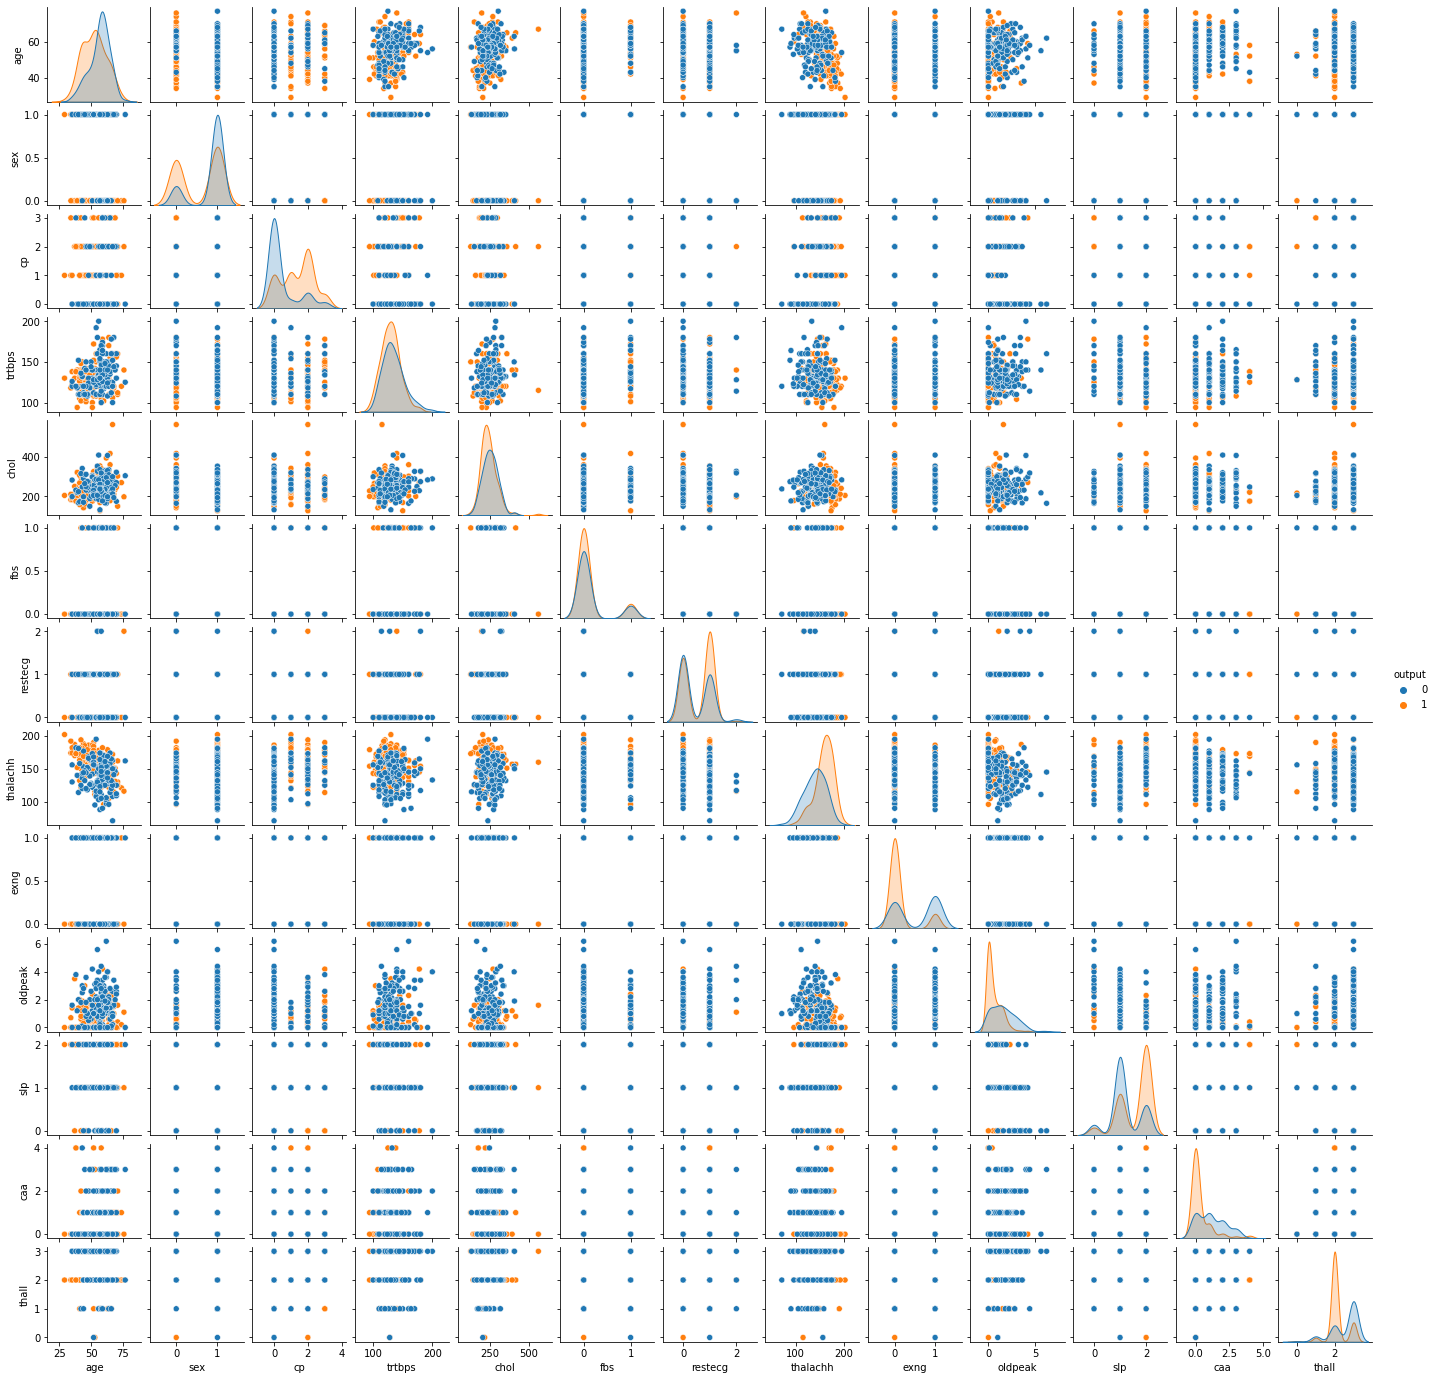

In [14]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(data, hue=data_name[len(data_name)-1], size=1.5)

<div style="background-color: white; border-bottom-left-radius:15px; border-bottom-right-radius:15px; width:93%; padding:2em 2em 0.2em 2em; font-family:Gill Sans, sans-serif;">
</div>

<div style="background-color: white; border-top-left-radius: 15px; border-top-right-radius: 15px; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <a id="#intro" style="text-decoration:none; color: black;"><h3 style="font-weight:700;"> 3. Preparazione del dataset </h3></a>
    <h4 style="color:black"> 3.1 Divisione del dataset in train e test set </h4>
</div>

In [226]:
# Nomi delle features e del target
X_name = data_name[0:13]
Y_name = [data_name[13]]

# Creo train e test set
X_train, X_test, Y_train, Y_test = train_test_split(data[X_name], data[Y_name], test_size=0.23)

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 3.2 Manipolazione dei dati </h4>
    <ul style="color: black;">
        <li>Tutti i set sono convertiti in array numpy</li>
        <li>Alle features viene aggiunto il bias della funzione d'ipotesi (θ<sub>0</sub>)</li>
        <li>Viene inizializzato il vettore dei pesi</li>
    </ul>
</div>

In [227]:
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

m_tr, n_tr = X_train.shape
X_train = np.concatenate((np.ones((m_tr,1)), X_train), axis=1)
n_tr +=1

m_te, n_te = X_test.shape
X_test = np.concatenate((np.ones((m_te,1)), X_test), axis=1)
n_te += 1

W = np.array(np.zeros((1,n_te)))

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 3.3 Normalizzazione dei dati </h4>
</div>

In [228]:
# Normalizzo i dati
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

<div style="background-color: white; border-bottom-left-radius:15px; border-bottom-right-radius:15px; width:93%; padding:2em 2em 0.2em 2em; font-family:Gill Sans, sans-serif;">
</div>

<div style="background-color: white; border-top-left-radius: 15px; border-top-right-radius: 15px; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <a id="#intro" style="text-decoration:none; color: black;"><h3 style="font-weight:700;"> 4. Applicazione del modello </h3></a>
    <h4 style="color:black"> 4.1 Allenamento del modello</h4>
</div>

In [229]:
gradient_ascent(X_train,W,Y_train,0.0001,0.00008)

inf
2.6660662368671595e-05
[[ 0.00000000e+00 -1.00389475e-05 -2.39412946e-05 -4.29813183e-06
  -1.10922521e-05 -1.56303922e-05 -1.77275971e-05 -1.16991745e-05
   8.62087924e-06 -1.03372679e-05 -3.25916805e-05 -1.49171414e-05
  -3.40201970e-05 -4.88009234e-05]]


1

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 4.2 Risultati del modello allenato </h4>
</div>

In [230]:
train_accurancy, train_predictions, train_prob_predictions = prediction(W,X_train,Y_train)
test_accurancy, test_predictions, test_prob_predictions = prediction(W,X_test,Y_test)
 
print("### MyLog:\n\tAccuracy of training: " + str(train_accurancy)+"\n\tAccuracy of test: " + str(test_accurancy))
print("### MyLog:\n\tError rate of training: " + str(1 - train_accurancy)+"\n\tError rate of test: " + str(1 - test_accurancy))

### MyLog:
	Accuracy of training: 0.7467811158798283
	Accuracy of test: 0.8142857142857143
### MyLog:
	Error rate of training: 0.2532188841201717
	Error rate of test: 0.18571428571428572


<div style="background-color: white; border-bottom-left-radius:15px; border-bottom-right-radius:15px; width:93%; padding:2em 2em 0.2em 2em; font-family:Gill Sans, sans-serif;">
</div>

<div style="background-color: white; border-top-left-radius: 15px; border-top-right-radius: 15px; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <a id="#intro" style="text-decoration:none; color: black;"><h3 style="font-weight:700;"> 5. Valutazione del modello </h3></a>
    <h4 style="color:black"> 5.1 Metrica d'errore</h4>
</div>

In [231]:
# metric_error = #valori classe 0 / #valori classi
metric_error = len(data[data.output == 0]) / len(data)
metric_accurancy = 1 - metric_error

print("Error rate di un classificatore che predice solo 0: ", metric_error)
print("Accuracy di un classificatore che predice solo 0: ", metric_accurancy)

Error rate di un classificatore che predice solo 0:  0.45544554455445546
Accuracy di un classificatore che predice solo 0:  0.5445544554455446


<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 5.2 Confusion Matrix </h4>
</div>

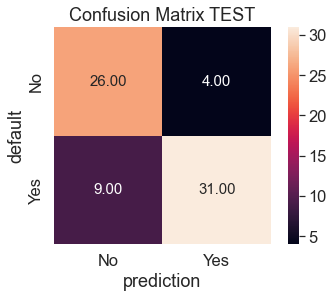

In [232]:
cm = confusion_matrix(Y_test, test_predictions)
plt.figure()
sns.set(font_scale=1.5)
hm = sns.heatmap( cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=['No', 'Yes'], xticklabels=['No', 'Yes'])
plt.title('Confusion Matrix TEST')
plt.ylabel('default')
plt.xlabel('prediction')
plt.show()

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 5.3 Curva precision e recall </h4>
</div>

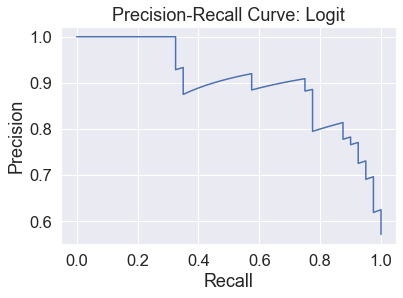

Precision:  0.5797101449275363
Recall:  1.0
f1-score:  0.8266666666666667


In [233]:
precision, recall, thresholds = precision_recall_curve(Y_test, test_prob_predictions)
plt.figure()
plt.plot(recall, precision)
plt.title("Precision-Recall Curve: Logit")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

print("Precision: ", precision[1])
print("Recall: ", recall[1])
print("f1-score: ", f1_score(Y_test, test_predictions))

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 5.4 Curva ROC e AUC </h4>
</div>

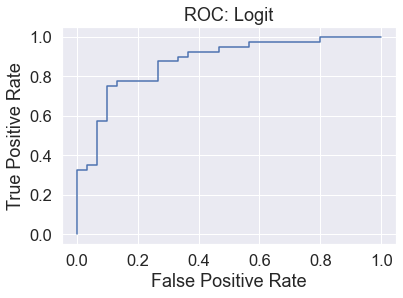

AUC:  0.8208333333333333


In [234]:
fpr, tpr, thresholds = roc_curve(Y_test, test_prob_predictions)
plt.figure()
plt.plot(fpr, tpr)
plt.title("ROC: Logit")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print ("AUC: ", roc_auc_score(Y_test, test_predictions))

<div style="background-color: white; border-bottom-left-radius:15px; border-bottom-right-radius:15px; width:93%; padding:2em 2em 0.2em 2em; font-family:Gill Sans, sans-serif;">
</div>